#  Heart Disease Analysis
## Dataset Description:

The dataset consists of medical records for patients,The attributes included in the dataset are as follows:

1. **Patient ID**: Unique patient identifier.
2. **Age**: Age in years.
3. **Sex**: Gender of the patient (1 = male, 0 = female).
4. **Cholesterol**: ISerum cholesterol (mg/dl).
5. **Blood Pressure**: Resting blood pressure category.
6. **Heart Rate**: Resting heart rate (bpm).
7. **Diabetes**: Diabetes status (1 = Yes, 0 = No).
8. **Family History**: Family history of heart disease (1 = Yes, 0 = No).
9. **Smoking**: Smoker (1 = Yes, 0 = No).
10. **Obesity**: Obesity status (1 = Yes, 0 = No).
11. **Alcohol Consumption**: Regular alcohol use (1 = Yes, 0 = No).
12. **Exercise Hours Per Week**: Average weekly exercise hours.
13. **Diet**: Diet type (e.g., Balanced, High-Fat, Low-Carb).
14. **Previous Heart Problems**: History of heart issues (1 = Yes, 0 = No).
15. **Medication Us**: Regular medication use (1 = Yes, 0 = No).
16. **Stress Level**: Self-reported stress level.
17. **Sedentary Hours Per Day**: Per Day: Daily sedentary hours.
18. **Income**: Income level.
19. **BMI**: Body Mass Index.
20. **Triglycerides**: Blood triglyceride level (mg/dl).
21. **Physical Activity Days Per Week**: Days of activity per week.
22. **Sleep Hours Per Day**: Per Day: Daily sedentary hours.
23. **Country**: Country of residence.
24. **Continent**: Continent of residence.
25. **Hemisphere**: Northern or Southern hemisphere.
26. **Heart Attack Risk**: Target variable indicating heart attack risk.

## Importing Necessary Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('default')
from matplotlib.colors import LinearSegmentedColormap

## Reading the Data 

In [7]:
df = pd.read_csv('heart_attack_prediction_dataset.csv')
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [9]:
#Overview of Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [11]:
#No. of rows and Columns
df.shape

(8763, 26)

In [13]:
#Total Memory Used
total_memory_used = df.memory_usage(deep=True).sum()
total_memory_used

4861992

In [15]:
#Checking total Duplicates
df.duplicated().sum()

0

In [17]:
#Checking total Null Values
df.isnull().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

## Population Distribution

In [20]:
#Total people in each continent
df["Continent"].value_counts()

Continent
Asia             2543
Europe           2241
South America    1362
Australia         884
Africa            873
North America     860
Name: count, dtype: int64

In [22]:
#Total males and females
df["Sex"].value_counts()

Sex
Male      6111
Female    2652
Name: count, dtype: int64

## Health & Lifestyle Overview

In [25]:
#People who smoke and doesn't smoke
df["Smoking"].value_counts()

Smoking
1    7859
0     904
Name: count, dtype: int64

In [27]:
#People at heart Risk
df["Heart Attack Risk"].value_counts()

Heart Attack Risk
0    5624
1    3139
Name: count, dtype: int64

## Statistical Summary

In [30]:
# Mean
df[['Age','Cholesterol','Income']].mean()

Age                53.707977
Cholesterol       259.877211
Income         158263.181901
dtype: float64

In [32]:
#Standard Deviation
df[['Age','Cholesterol','Income']].std()

Age               21.249509
Cholesterol       80.863276
Income         80575.190806
dtype: float64

In [34]:
#Mode
df[['Age','Cholesterol','Income']].mode()

,Age,Cholesterol,Income
0,90,235,225278


## Data Preprocessing

In [37]:
#1 Renaming Sleeping Hours per Day to Sleeping Hours
df.rename(columns = {"Sleep Hours Per Day" : "Sleeping Hours"},inplace = True)

In [39]:
# Renaming Physical Activity Days per week to Physical Activity per Week,
# Sedentary Hours Per Day to Sedentary Hours, Patient ID to ID

df.rename(columns = {"Activity Per Week" : "Physical Activity Per Week",
                     "Sedentary Hours Per Day": "Sedentary Hours","Patient ID" :"ID"},inplace = True)

In [41]:
# Blood Pressure Processing Safe
if 'Blood Pressure' in df.columns:
    df['Blood Pressure'] = df['Blood Pressure'].astype(str)
    bp_split = df['Blood Pressure'].str.split('/', expand=True)
    if bp_split.shape[1] < 2:
        bp_split[1] = np.nan
    bp_split.columns = ['BP_Systolic', 'BP_Diastolic']
    bp_split['BP_Systolic'] = pd.to_numeric(bp_split['BP_Systolic'], errors='coerce')
    bp_split['BP_Diastolic'] = pd.to_numeric(bp_split['BP_Diastolic'], errors='coerce')
    df = pd.concat([df, bp_split], axis=1)

    df.drop('Blood Pressure', axis=1, inplace=True)

In [43]:
# Printing some rows to check renamed columns
df.head()

,ID,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleeping Hours,Country,Continent,Hemisphere,Heart Attack Risk,BP_Systolic,BP_Diastolic
0,BMW7812,67,Male,208,72,0,0,1,0,0,...,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0,158,88
1,CZE1114,21,Male,389,98,1,1,1,1,1,...,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0,165,93
2,BNI9906,21,Female,324,72,1,0,0,0,0,...,28.176571,587,4,4,France,Europe,Northern Hemisphere,0,174,99
3,JLN3497,84,Male,383,73,1,1,1,0,1,...,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0,163,100
4,GFO8847,66,Male,318,93,1,1,1,1,0,...,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0,91,88


## Visual Analysis

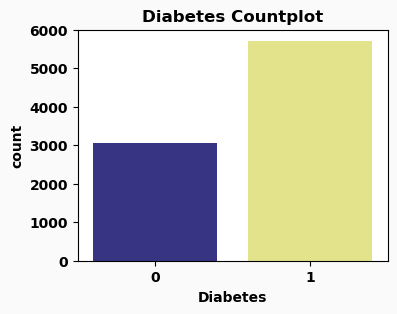

In [138]:
# Countplot of Diabetes column with custom colors (Seaborn >=0.14)
plt.figure(figsize=(4,3), facecolor="#FAFAFA")
diet_count_plot = sns.countplot(x=df["Diabetes"], hue=df["Diabetes"], palette= ["#2A2890", "#F1F17D"], legend=False)
plt.title("Diabetes Countplot",fontweight="bold")
plt.show()

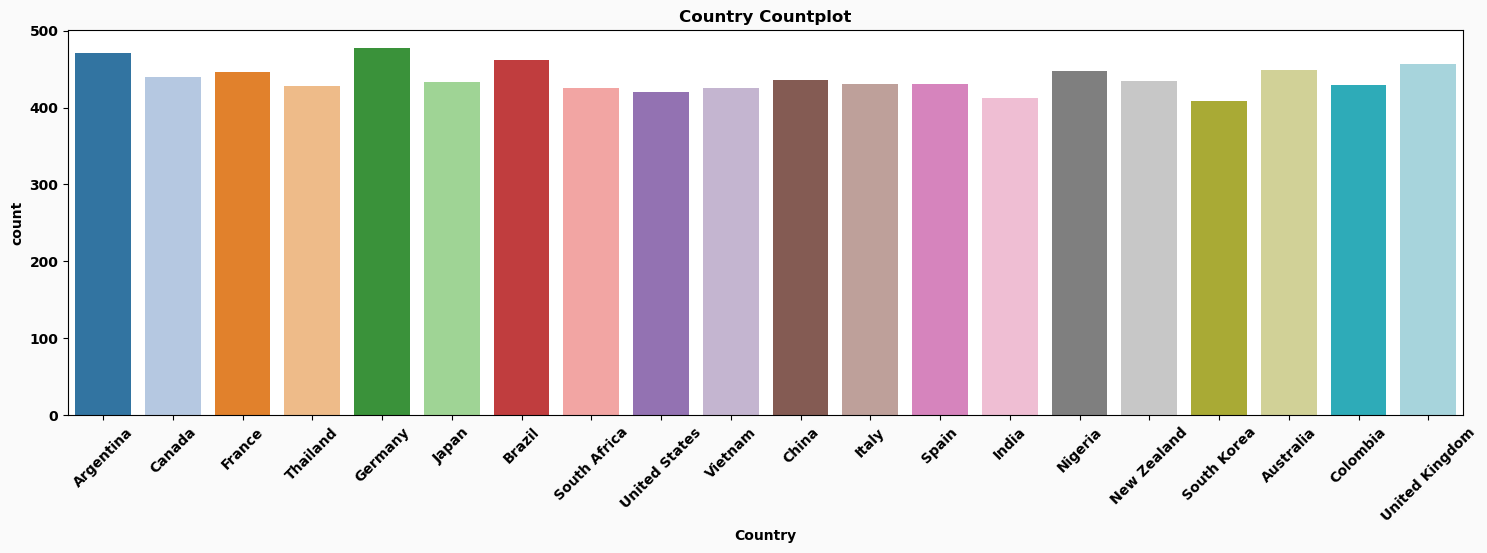

In [136]:
#1 printing countplot of country column
plt.figure(figsize=(18,5), facecolor="#FAFAFA") 
country_count_plot = sns.countplot( x=df["Country"], hue=df["Country"],palette="tab20", legend=False)
plt.xticks(rotation=45,fontweight="bold")
plt.title("Country Countplot")
plt.show()

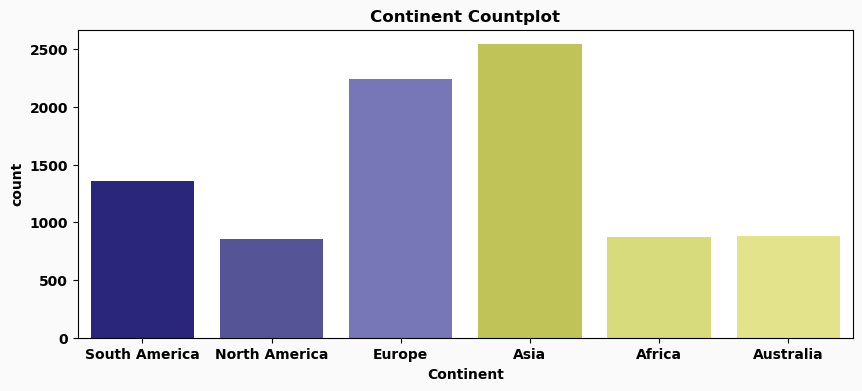

In [134]:
#1 Printing countplot of Continent column
plt.figure(figsize=(10,4), facecolor="#FAFAFA") 
Cont_count_plot = sns.countplot(x = df["Continent"], hue=df["Continent"],  palette=["#1C1889", "#4B49A1", "#6D6BC2", "#D0D646", "#E6EB6B", "#F1F17D"], legend=False)
plt.title("Continent Countplot")
plt.show()

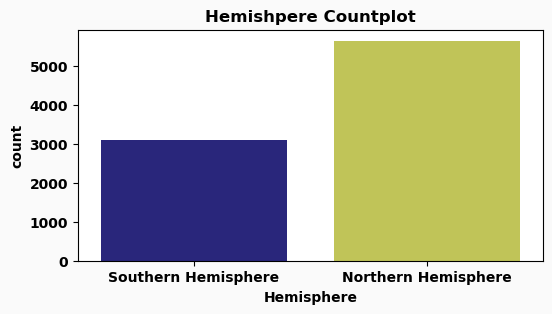

In [132]:
#1 Printing countplot of hemisphere column
plt.figure(figsize=(6,3), facecolor="#FAFAFA")
hemisphere_count_plot = sns.countplot(x = df["Hemisphere"],hue=df["Hemisphere"], palette= ["#1C1889", "#D0D646"], legend=False)
plt.title("Hemishpere Countplot",fontweight="bold")
plt.show()

In [126]:
df.columns

Index(['ID', 'Age', 'Sex', 'Cholesterol', 'Heart Rate', 'Diabetes',
       'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption',
       'Exercise Hours Per Week', 'Diet', 'Previous Heart Problems',
       'Medication Use', 'Stress Level', 'Sedentary Hours', 'Income', 'BMI',
       'Triglycerides', 'Physical Activity Days Per Week', 'Sleeping Hours',
       'Country', 'Continent', 'Hemisphere', 'Heart Attack Risk',
       'BP_Systolic', 'BP_Diastolic'],
      dtype='object')

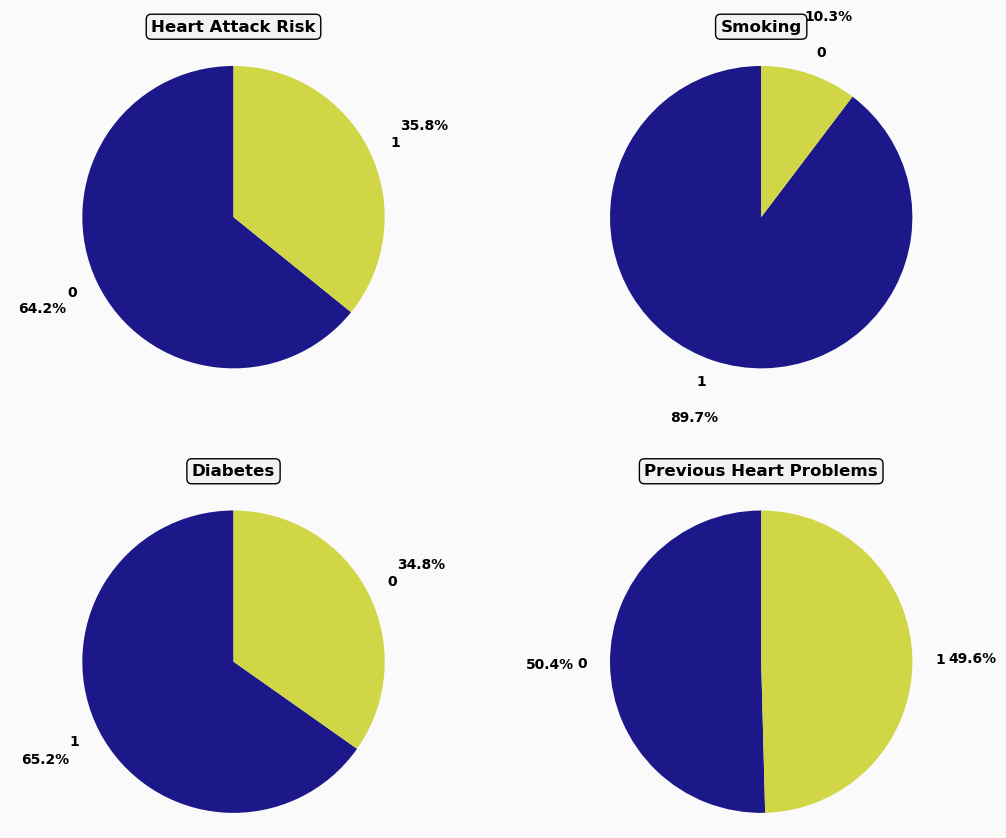

In [128]:
# Pie Plots
colors = ["#1C1889", "#D0D646"]
fig, axes = plt.subplots(2, 2, figsize=(11,9), facecolor="#FAFAFA")
axes = axes.flatten()
for ax, (col_name, title) in zip(axes, columns):
    counts = df[col_name].value_counts()
    ax.pie(
        counts,
        labels=counts.index,
        autopct='%1.1f%%',
        colors=colors[:len(counts)],
        startangle=90,
        labeldistance=1.15, pctdistance=1.4
    )
    ax.axis('equal')
    ax.text(
        0.5, 1.05, 
        title,
        transform=ax.transAxes,
        ha='center', va='bottom',
        fontsize=12,
        fontweight='bold',
        bbox=dict(facecolor='#f2f2f2', edgecolor='black', boxstyle='round,pad=0.3')
    )
plt.tight_layout(pad=3)
plt.show()

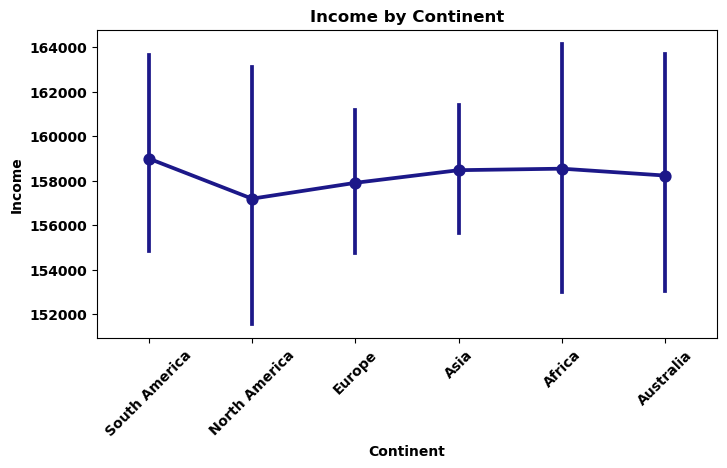

In [140]:
plt.figure(figsize=(8,4))
sns.pointplot(x='Continent', y='Income', data=df, color="#1C1889")
plt.xlabel("Continent")
plt.ylabel("Income")
plt.xticks(rotation=45)
plt.title("Income by Continent")
plt.show()

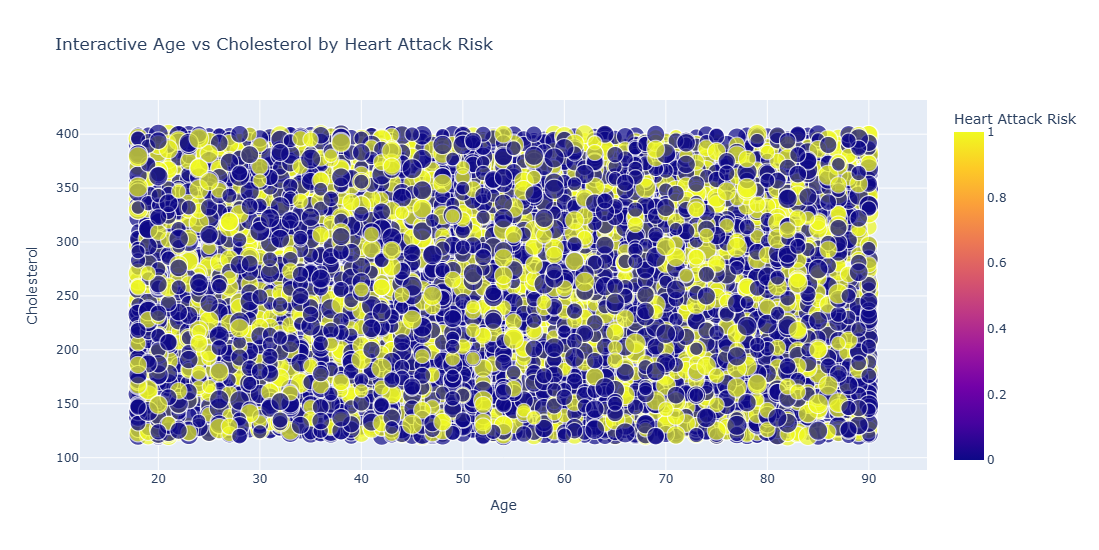

In [146]:
import plotly.express as px
df['Heart Attack Risk'] = df['Heart Attack Risk'].astype(int)

fig = px.scatter(
    df,
    x='Age',
    y='Cholesterol',
    color='Heart Attack Risk',
    size='BMI',
    hover_data=['Sex', 'Smoking', 'Diabetes'],
    title='Interactive Age vs Cholesterol by Heart Attack Risk',
    width=900,  height=550 , 
)
fig.show()

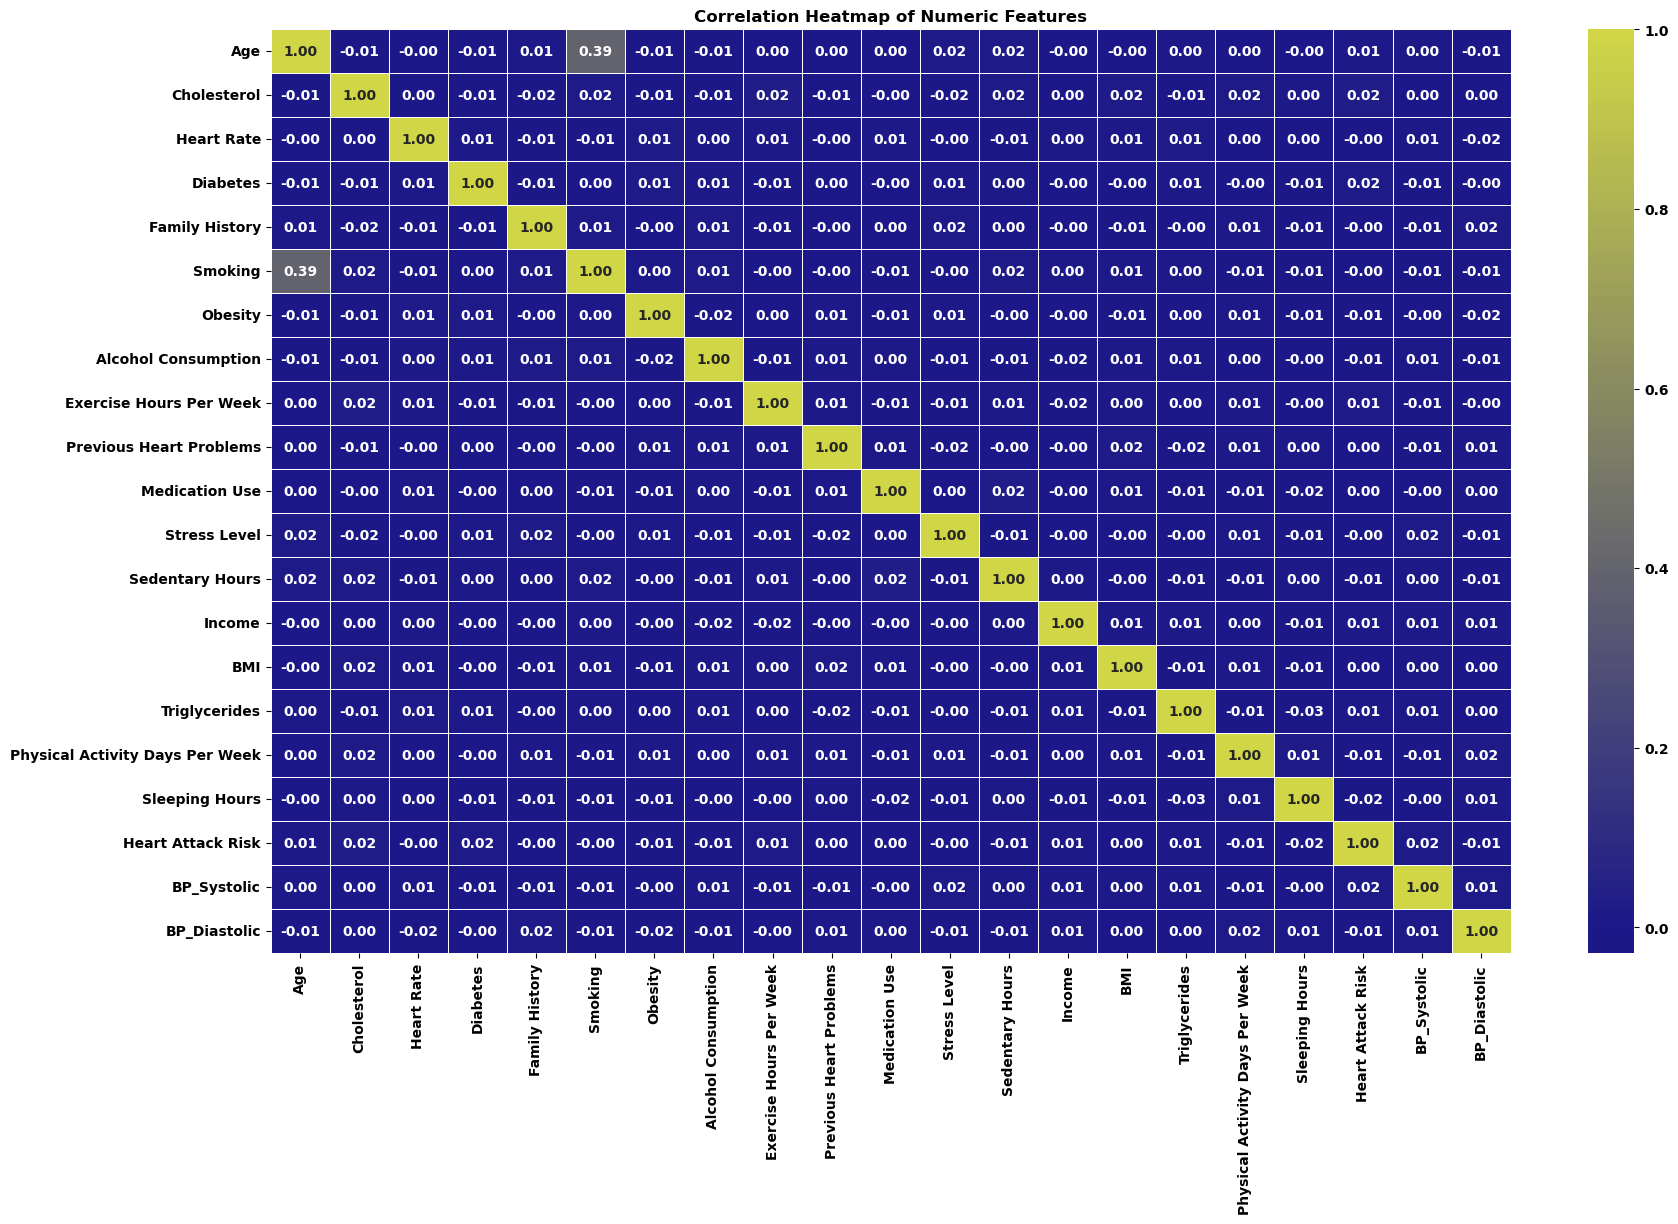

In [148]:
plt.figure(figsize=(20,12))
numeric_df = df.select_dtypes(include=['int64', 'float64', 'int32'])
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap',["#0B0A5A", "#1C1889", "#D0D646"])
sns.heatmap(
    numeric_df.corr(),
    annot=True,
    fmt='.2f',
    cmap=custom_cmap,
    center=0,
    linewidths=0.5
)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

In [ ]:
plt.rcParams.update({
    "font.weight": "bold",
    "axes.labelweight": "bold",
    "axes.titleweight": "bold"
})